## Sense Check and Explore the April 2022 Race data

#### Get a feel for the data and how to process it

In [33]:
# Try to use Seaborn/Matplotlib to replicate another cool viz from Cole Nusaumbber Knaflic's book Storytelling with Data.
# Inspiration from :
# https://github.com/adamribaudo/storytelling-with-data-ggplot
# Using code from the excellent:
# https://github.com/empathy87/storytelling-with-data

## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
from pandas import DataFrame

%matplotlib inline

In [34]:
df_Apr = pd.read_csv ('..\Data\April_2022.csv'  )
df_Apr['Month'] = "Apr"

df_Oct= pd.read_csv ('..\Data\October_2022.csv'  )
df_Oct['Month'] = "Oct"

In [35]:
df = pd.concat  ( [  df_Apr , df_Oct ] )

#### Temporary fix up - move this code to Scratch Notebook

In [36]:
df['0K_5K_SECTION_TIME']   = df['5K_MINS']
df['5K_10K_SECTION_TIME']  = df['10K_MINS']  - df['5K_MINS']
df['10K_15K_SECTION_TIME'] = df['15K_MINS']  - df['10K_MINS']
df['15K_20K_SECTION_TIME'] = df['20K_MINS']  - df['15K_MINS']

In [37]:
df.Month.value_counts()

Oct    13160
Apr    11572
Name: Month, dtype: int64

In [38]:
# Now Find the means for each section and Category
df.groupby (['Month' ] ).agg (
     num_runners=('RACE_NUMBER', 'count' )
    ,time_mins = ('CHIP_TIME_MINS', 'mean' )
).reset_index(drop=False)
#df_agg1.sort_values('CATEGORY')

,Month,num_runners,time_mins
0,Apr,11572,130.399274
1,Oct,13160,130.934758


In [39]:
df.loc [ df.CATEGORY.isna(), 'CATEGORY'] = 'NOT_GIVEN'
# There are two 'NOT_GIVEN' rows - drop them

df = df [ df.CATEGORY != 'NOT_GIVEN'  ]

#### Columns

In [40]:
df.columns

Index(['RACE_NUMBER', 'FIRST_NAME', 'SURNAME', 'GENDER', 'GENDER_POSITION',
       'CATEGORY', 'CATEGORY_POSITION', 'CLUB', '5K', '10K', '15K', '20K',
       'OVERALL_POSITION', 'CHIP_TIME', 'CHIP_POSITION', 'CHIP_TIME_MINS',
       '5K_MINS', '10K_MINS', '15K_MINS', '20K_MINS', 'min_per_km_course',
       'min_per_km_0_5', 'min_per_km_6_10', 'min_per_km_11_15',
       'min_per_km_16_20', 'min_per_km_21_FINISH', '5K_10K_SECTION_TIME',
       '10K_15K_SECTION_TIME', '15K_20K_SECTION_TIME', 'Month',
       '0K_5K_SECTION_TIME'],
      dtype='object')

#### How can we group up the ages

In [41]:
# Now Find the means for each section and Category
df_agg1 =   df.groupby (['CATEGORY', 'Month' ] ).agg (
     num_runners=('RACE_NUMBER', 'count' )
    ,time_mins = ('CHIP_TIME_MINS', 'mean' )
).reset_index(drop=False)
df_agg1 = df_agg1.sort_values('CATEGORY')

df_piv = df_agg1.reset_index().pivot( index='CATEGORY' , columns='Month', values=['time_mins', 'num_runners'] ).fillna(0)
df_piv.head (3)


time_mins             num_runners       
Month            Apr         Oct         Apr    Oct
CATEGORY                                           
F35+      139.420428  139.701900       740.0  763.0
F40+      141.822846  141.804206       828.0  852.0
F45+      143.585848  142.845796       729.0  670.0

In [28]:
def flattenHierarchicalCol(col,sep = '_'):
    if not type(col) is tuple:
        return col
    else:
        new_col = ''
        for leveli,level in enumerate(col):
            if not level == '':
                if not leveli == 0:
                    new_col += sep
                new_col += level
        return new_col

df_piv.columns = df_piv.columns.map(flattenHierarchicalCol)
df_piv.head(10)


,time_mins_Apr,time_mins_Oct,num_runners_Apr,num_runners_Oct
CATEGORY,,,,
F35+,139.420428,139.701900,740.0,763.0
F40+,141.822846,141.804206,828.0,852.0
F45+,143.585848,142.845796,729.0,670.0
F50+,147.560999,145.279279,544.0,596.0
F55+,146.216565,148.149046,329.0,332.0
F60+,155.955839,146.978132,137.0,141.0
F65+,159.245635,155.558333,42.0,60.0
F70+,170.104167,164.204167,8.0,24.0
F75+,180.940000,170.166667,5.0,4.0


#### Recategorize

In [42]:
df['SPEED_CATEGORY'] = "Normal"

In [43]:
#df.loc [df.CATEGORY.fillna ('No').str.contains ('OPEN')  , 'ENTRY_STATUS'] = "Elite"

boolIndex = np.logical_and ( df.CHIP_TIME_MINS <= 60 + 30  , df.GENDER== 'Male')
df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Elite'

boolIndex = np.logical_and ( df.CHIP_TIME_MINS <= 60 + 40 , df.GENDER== 'Female')
df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Elite'

#### label our rows in the dataset.



In [44]:

boolIndex =    ( df.FIRST_NAME.str.contains ('Ellena') ) &\
               ( df.SURNAME.str.contains ( 'Green') )    &\
               (  df.Month == "Apr" )

df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Us_Apr'



boolIndex =    ( df.FIRST_NAME.str.contains ('Ellena') ) &\
               ( df.SURNAME.str.contains ( 'Green') )    &\
               (  df.Month == "Oct" )

df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Us_Oct'


boolIndex =    ( df.FIRST_NAME.str.contains ('John') ) &\
               ( df.SURNAME.str.contains ( 'Steedman') )&\
               (  df.Month == "Apr" )

df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Us_Apr'


boolIndex =    ( df.FIRST_NAME.str.contains ('John') ) &\
               ( df.SURNAME.str.contains ( 'Steedman') )&\
               (  df.Month == "Oct" )

df.loc [ boolIndex , 'SPEED_CATEGORY']  = 'Us_Oct'


In [45]:
boolIndex.value_counts()

False    24729
True         1
dtype: int64

In [46]:
(df.Month=='Oct').value_counts()

True     13158
False    11572
Name: Month, dtype: int64

In [47]:
df.SPEED_CATEGORY.value_counts()

Normal    23261
Elite      1465
Us_Apr        2
Us_Oct        2
Name: SPEED_CATEGORY, dtype: int64

In [48]:
# Now Find the means for each section and Category
df_agg1 =   df.groupby (['SPEED_CATEGORY',  'GENDER', 'Month' ] ).agg (
     num_runners=('RACE_NUMBER', 'count' )
    ,time_mins = ('CHIP_TIME_MINS', 'mean' )
).reset_index(drop=False)
df_agg1.sort_values('SPEED_CATEGORY')

,SPEED_CATEGORY,GENDER,Month,num_runners,time_mins
0,Elite,Female,Apr,146,92.481164
1,Elite,Female,Oct,204,90.855801
2,Elite,Male,Apr,488,82.655977
3,Elite,Male,Oct,627,81.603402
4,Normal,Female,Apr,5030,143.687247
5,Normal,Female,Oct,5516,144.383883
6,Normal,Male,Apr,5906,123.961147
7,Normal,Male,Oct,6809,125.796245
8,Us_Apr,Female,Apr,1,163.250000
9,Us_Apr,Male,Apr,1,117.400000


#### Get a Long Data Frame

In [55]:
# Create a new frame indexed by gender, category and race section.
# This is so that mean times/speeds can be calculated for gruoups.

df_long = pd.concat ( [

DataFrame ({               'GENDER'    : df.GENDER,\
                          'SPEED_CATEGORY'   : df.SPEED_CATEGORY,\
                          'SECTION_TIME': df['0K_5K_SECTION_TIME'],
                          'SECTION'   :'0-5' })
,
DataFrame ({                'GENDER'   : df.GENDER,\
                            'SPEED_CATEGORY'  : df.SPEED_CATEGORY,\
                            'SECTION_TIME': df['5K_10K_SECTION_TIME'],\
                            'SECTION'   :'6-10' })
,
DataFrame ({                'GENDER'   : df.GENDER,\
                            'SPEED_CATEGORY'  : df.SPEED_CATEGORY,\
                            'SECTION_TIME': df['10K_15K_SECTION_TIME'],\
                            'SECTION'   :'11-15' })
,
DataFrame ({                'GENDER'   : df.GENDER,\
                            'SPEED_CATEGORY'  : df.SPEED_CATEGORY,\
                            'SECTION_TIME': df['15K_20K_SECTION_TIME'],\
                            'SECTION'   :'16-20' })
#,
#DataFrame ({ 'GENDER'   : df.GENDER,\
#                            'ELITE_STATUS'  : df.ENTRY_STATUS,\
#                            'SECTION_TIME': df.min_per_km_16_20,\
#                            'SECTION'   :'min_per_km_21_FINISH' })

]
)

In [50]:
# Now Find the means for each section and Category
df_agg1 =   df_long.groupby (['SPEED_CATEGORY', 'GENDER',"SECTION"] ).agg (
     SECTION_TIME=('SECTION_TIME', 'mean' )
    ,NUM_RUNNERS=('SECTION_TIME', 'count' )
).reset_index(drop=False)

In [51]:
df_agg1.head()

,SPEED_CATEGORY,GENDER,SECTION,SECTION_TIME,NUM_RUNNERS
0,Elite,Female,0-5,21.203238,350
1,Elite,Female,11-15,21.859619,350
2,Elite,Female,16-20,22.359190,350
3,Elite,Female,6-10,21.553476,350
4,Elite,Male,0-5,19.056682,1115


In [52]:
# Need to sort this data frame by section

codes = {'0-5':1 , '6-10':2, '11-15':3, '16-20': 4}
df_agg1['sort_order'] = df_agg1['SECTION'].map(codes)
df_agg1 = df_agg1.sort_values (['sort_order'])
df_agg1.head(2)

,SPEED_CATEGORY,GENDER,SECTION,SECTION_TIME,NUM_RUNNERS,sort_order
0,Elite,Female,0-5,21.203238,350,1
28,Us_Oct,Male,0-5,23.816667,1,1


[Text(0, 0.5, 'Section Time (mins)'), Text(0.5, 0, 'Race Sections')]

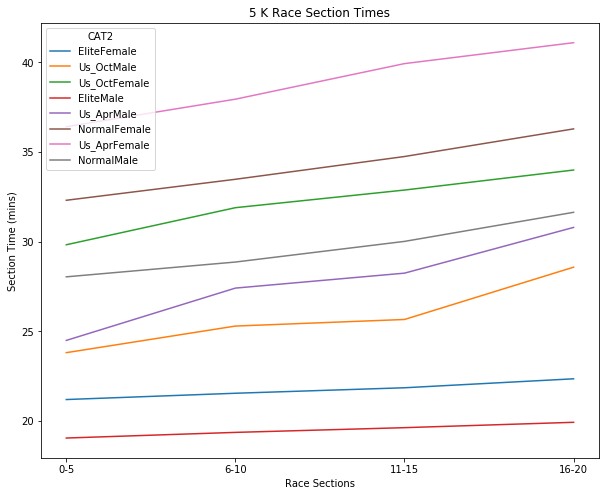

In [54]:
df_agg1['CAT2'] = df_agg1['SPEED_CATEGORY'] + df_agg1['GENDER']
 
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

plt.title ("5 K Race Section Times")

g = sns.lineplot ( data = df_agg1, 
             x= "SECTION", 
              y="SECTION_TIME",
             hue)

g.set(xlabel="Race Sections", ylabel="Section Time (mins)")

#ax.set_ylim (bottom=4)

# Observations
1) Ellena crossed average female time
2) Ellena is a good finisher
3) I was consistently better in the second race but need to work on a smoother pace throughout.
